In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [200]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [201]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [202]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [203]:
df.loc[:122,'region']=1
df.loc[122:,'region']=1

In [204]:
df['day'].isna().sum()


0

In [205]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [206]:
df=df.dropna().reset_index(drop=True)

In [207]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [213]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region          int32
dtype: object

In [209]:
df['region']=df['region'].astype('int')

In [211]:
df.columns=df.columns.str.strip()

In [214]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [229]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [228]:
df=df.drop(122).reset_index(drop=True)

In [230]:
df.loc[122]

day                     01
month                   06
year                  2012
Temperature             32
RH                      71
Ws                      12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
region                   1
Name: 122, dtype: object

In [235]:
df['Classes']=df['Classes'].str.strip()

In [236]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [237]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region          int32
dtype: object

In [238]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [240]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [243]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [244]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [247]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [250]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [251]:
# let save the cleaned dataset 
df.to_csv('Algerian_forest_fires_clean_dataset.csv',index=False)

In [269]:
df_copy=df.drop(['day','month','year'],axis=1)

In [255]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [256]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

C:\Users\ParagYadav\AppData\Local\Temp\ipykernel_17084\1497677876.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


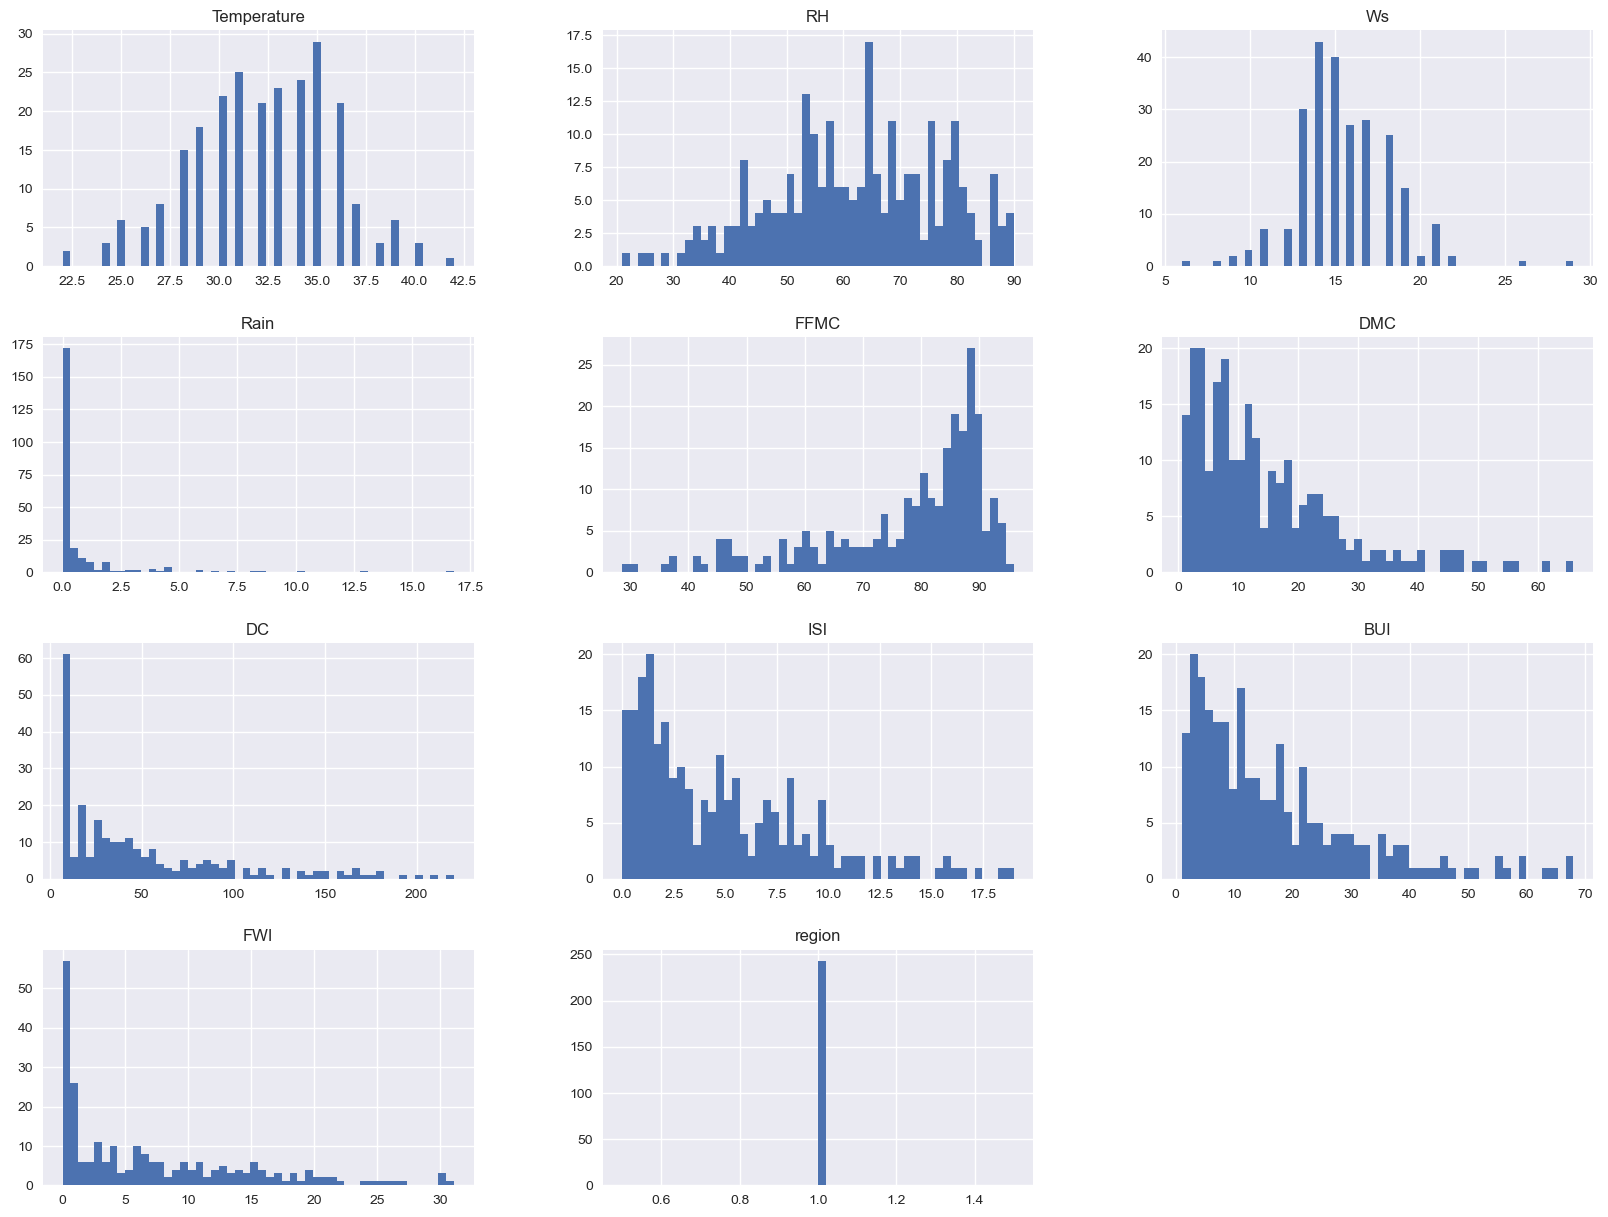

In [258]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

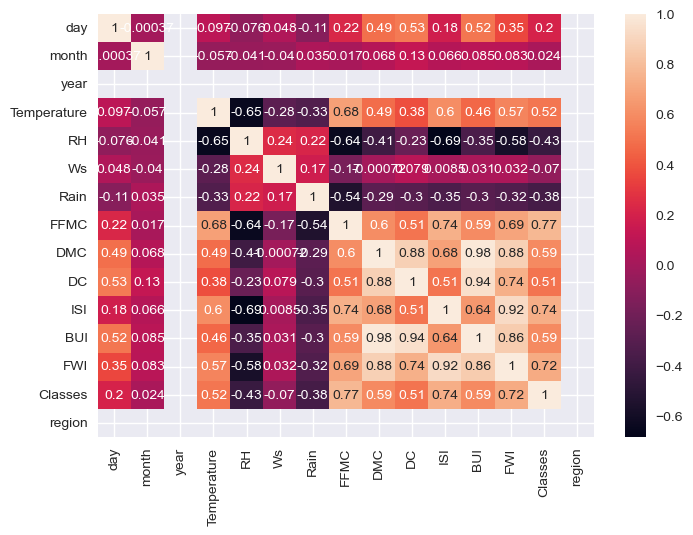

In [262]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

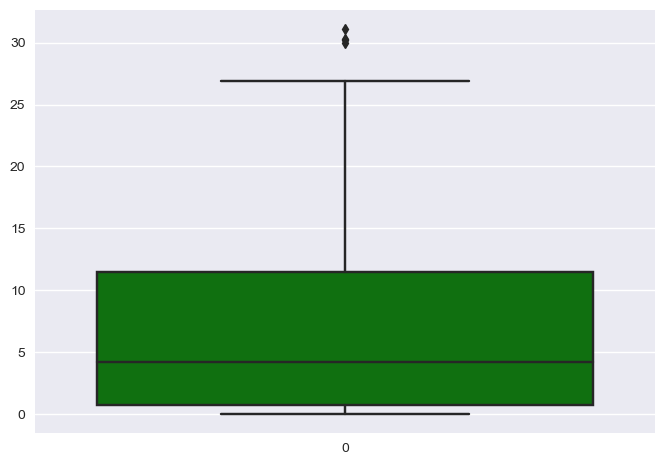

In [263]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

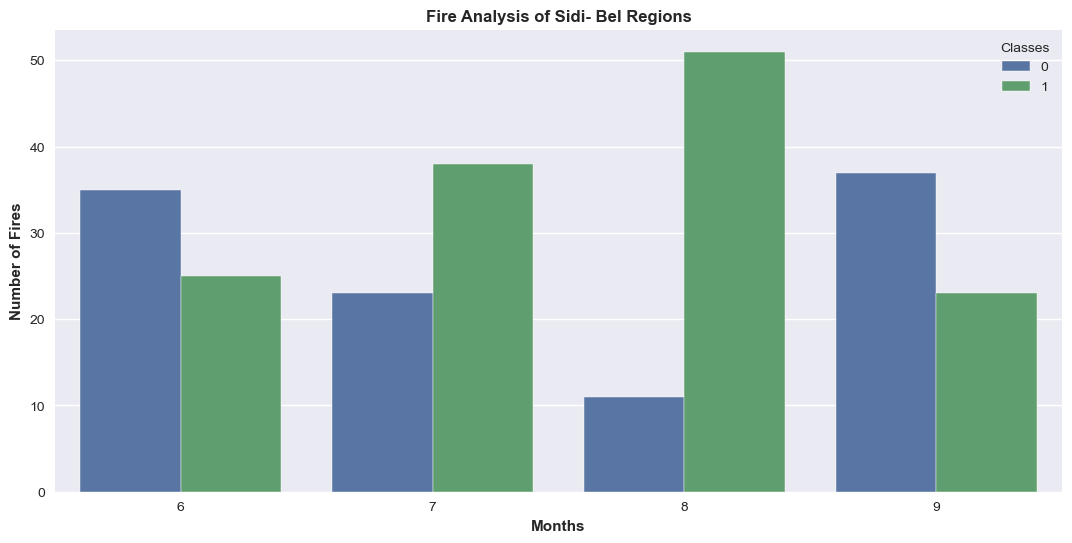

In [265]:
## Monthly Fire Analysis
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
x=df_copy.drop(['FWI'],axis=1)

In [353]:
y=df_copy['FWI']

In [354]:
# Data split into train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# # Featurea selection based on correlation

In [355]:

# Featurea selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,NaN
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,NaN
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,NaN
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,NaN
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,NaN
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,NaN
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,NaN
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,NaN
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,NaN
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,NaN


<Axes: >

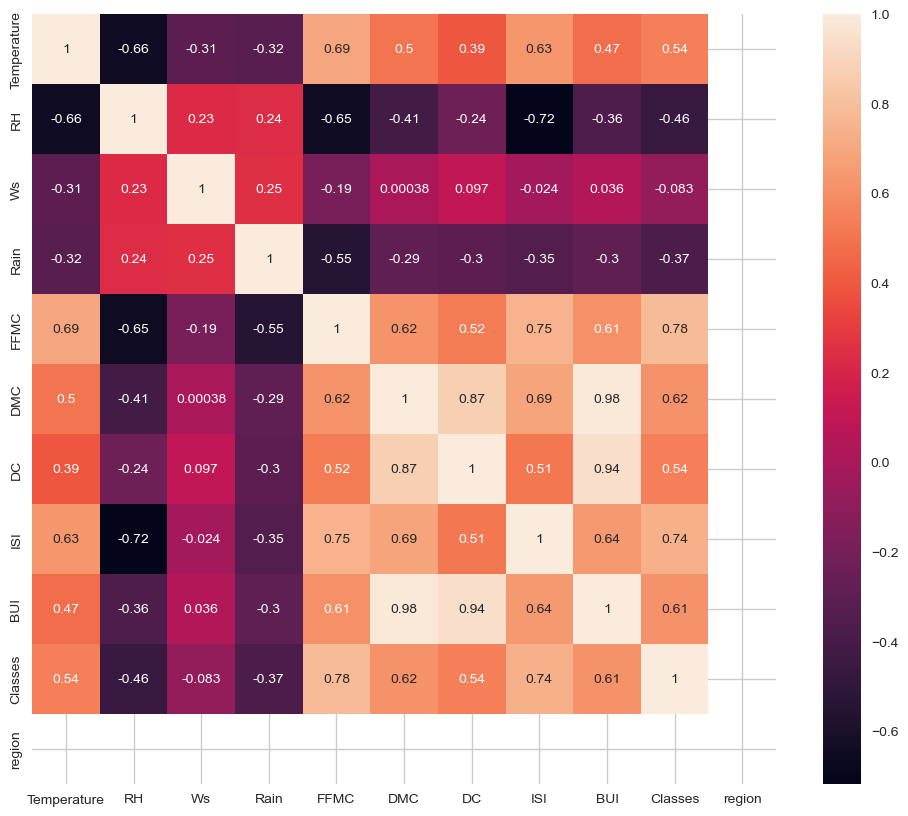

In [356]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True)

In [357]:
def correlation(datasets,threshold):
    cor_colm=set()
    cor_matrix=datasets.corr()
    for i in range(len(cor_matrix)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j])>threshold:
                colname=cor_matrix.columns[i]
                cor_colm.add(colname)
             
    return(cor_colm)
    
            
            
        
            

In [358]:
cor_feature=correlation(X_train,0.85)

In [366]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
97,29,74,19,0.1,75.8,3.6,2.1,0,1
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,1
119,32,47,14,0.7,77.5,7.1,1.8,0,1
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,1
14,28,80,17,3.1,49.4,3.0,0.4,0,1
92,25,76,17,7.2,46.0,1.3,0.2,0,1
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [375]:
X_train.shape

(182, 9)

In [379]:
X_test.shape


(61, 9)

In [378]:
X_test=X_test.drop(cor_feature,axis=1)

# Feature scaling or standarization

In [380]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [383]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

# Box Plots To understand Effect of standard scaler

C:\Users\ParagYadav\AppData\Local\Temp\ipykernel_17084\1997841964.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

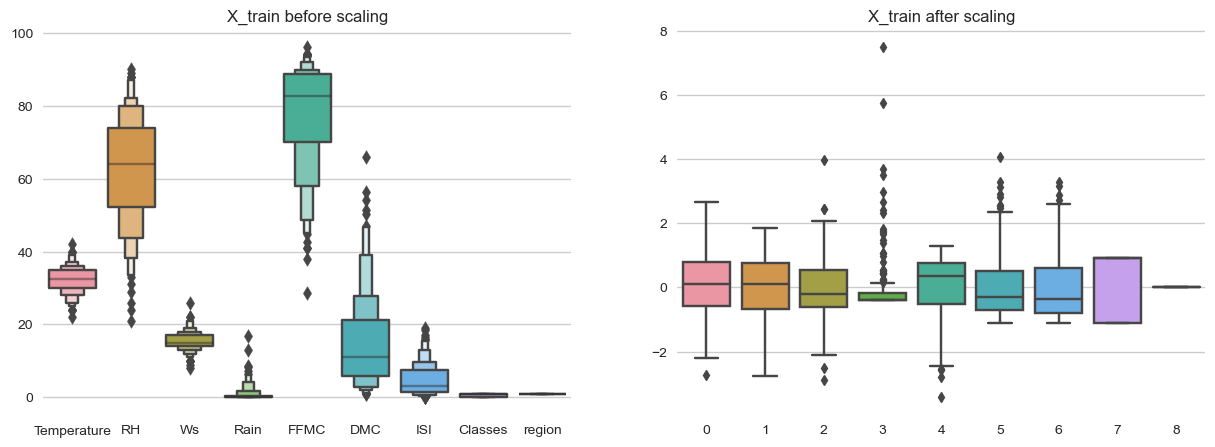

In [388]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scale)
plt.title('X_train after scaling')

# Linear Regression model

In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()

In [390]:
linreg.fit(X_train_scale,y_train)

LinearRegression()

In [398]:
y_pred=linreg.predict(X_test_scale)
MAE=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error is',MAE)
print('R2 score',score)

Mean absolute error is 0.5842707645701563
R2 score 0.9818991727411215


# Lasso Regression

In [401]:
from sklearn.linear_model import Lasso
lasreg=Lasso()


In [405]:
lasreg=lasreg.fit(X_train_scale,y_train)
y_pred_l=lasreg.predict(X_test_scale)
l_mse=mean_absolute_error(y_test,y_pred_l)
l_score=r2_score(y_test,y_pred_l)
print('Mean absolute error is',l_mse)
print('R2 score',l_score)

Mean absolute error is 1.1331759949144087
R2 score 0.9492020263112388


# Ridge Regression model

In [406]:
from sklearn.linear_model import Ridge

In [407]:
ridge_reg=Ridge()
ridge_reg.fit(X_train_scale,y_train)
y_pred_ridge=ridge_reg.predict(X_test_scale)
r_mse=mean_absolute_error(y_test,y_pred_ridge)
r_score=r2_score(y_test,y_pred_ridge)
print('Mean absolute error is',r_mse)
print('R2 score',r_score)

Mean absolute error is 0.6006561235951368
R2 score 0.9813046839382391


# Elasticnet Regression

In [410]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scale,y_train)
y_pred=elastic.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


# pickling

In [413]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_reg,open('ridge.pkl','wb'))
